<a href="https://colab.research.google.com/github/daniloagz/ImersaoIA_Alura_google/blob/main/AlertaAzul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite a data da leitura (DD/MM/AAAA): 16/05/2024
 Digite a leitura do hidrômetro: 2050
Digite o país: brasil


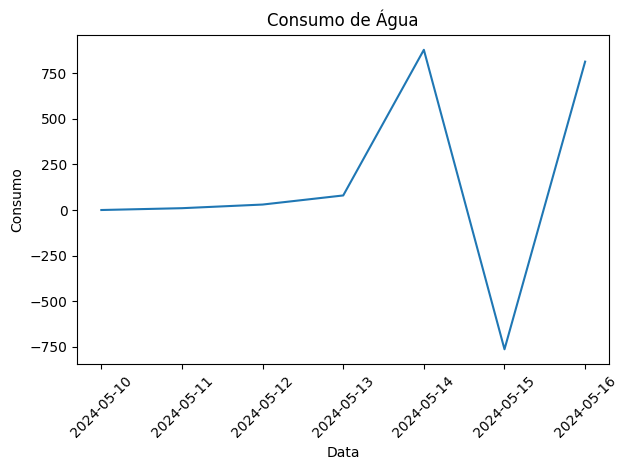

'**Comparação com a média brasileira**\n\nDe acordo com dados da ONS (Operador Nacional do Sistema Elétrico), o consumo médio de água no Brasil é de 190 litros por pessoa por dia.\n\nConvertendo o valor de consumo fornecido para litros e dividindo pelo número de dias:\n\n```\n815.000 m³ / (1000 * 365) ≈ 2235 litros/pessoa/dia\n```\n\nPortanto, o consumo de 815.0m³ em 1 dia por pessoa é **cerca de 11,8 vezes maior** do que a média brasileira.\n\n**Comparação com a média mundial**\n\nDe acordo com a ONS, a média mundial de consumo de água é de 135 litros por pessoa por dia.\n\nConvertendo o valor de consumo fornecido para litros e dividindo pelo número de dias:\n\n```\n815.000 m³ / (1000 * 365) ≈ 2235 litros/pessoa/dia\n```\n\nPortanto, o consumo de 815.0m³ em 1 dia por pessoa é **cerca de 16,6 vezes maior** do que a média mundial.'

In [36]:
import datetime
import json
import matplotlib.pyplot as plt
import google.generativeai as genai

# Sua API Key do Google Generative AI
from google.colab import userdata
api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

# Carregar leituras existentes ou criar um novo arquivo
try:
  with open('Hidrometro_Leituras.json', 'r') as f:
    hidrometro_leituras = json.load(f)
except FileNotFoundError:
  hidrometro_leituras = []

# Função para solicitar e validar a data
def solicitar_data():
  while True:
    data_str = input("Digite a data da leitura (DD/MM/AAAA): ")
    try:
      data = datetime.datetime.strptime(data_str, "%d/%m/%Y").date()
      return data
    except ValueError:
      print("Data inválida. Use o formato DD/MM/AAAA.")

# Função para solicitar e validar a leitura
def solicitar_leitura():
  while True:
    try:
      leitura = float(input(" Digite a leitura do hidrômetro: "))
      if leitura >= 0:
        return leitura
      else:
        print("Leitura inválida. Digite um valor não negativo.")
    except ValueError:
      print("Leitura inválida. Digite um número.")

# Solicitar data e leitura do usuário
data = solicitar_data()
leitura = solicitar_leitura()

# Solicitar o país
pais = input("Digite o país: ")


# Calcular consumo e dias de utilização
if hidrometro_leituras:
  ultima_leitura = hidrometro_leituras[-1]['Leitura']
  ultimo_data = datetime.datetime.strptime(hidrometro_leituras[-1]['Data'], "%d/%m/%Y").date()
  consumo = leitura - ultima_leitura
  dias_utilizacao = (data - ultimo_data).days
else:
  consumo = 0
  dias_utilizacao = 0


# Adicionar a nova leitura ao histórico
hidrometro_leituras.append({
  "Data": data.strftime("%d/%m/%Y"),
  "Leitura": leitura,
  "Consumo": consumo,
  "DiasUtilizacao": dias_utilizacao
})

# Salvar as leituras atualizadas no arquivo JSON
with open('Hidrometro_Leituras.json', 'w') as f:
  json.dump(hidrometro_leituras, f, indent=4)

# Criar o gráfico de consumo
datas = [datetime.datetime.strptime(leitura['Data'], "%d/%m/%Y") for leitura in hidrometro_leituras]
consumos = [leitura['Consumo'] for leitura in hidrometro_leituras]

plt.plot(datas, consumos)
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.title('Consumo de Água')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Avaliar o consumo com GenAI
# prompt = "Fale resumidamente sobre a importancia da economia de água."
prompt = f"Compare o consumo de {consumo}m³ em {dias_utilizacao} dias por pessoa com a média por pessoa para o mesmo período no {pais}.Compare também com a média mundial segundo a ONS"

prompt

generation_config = {
  "candidate_count": 1,
  "temperature": 1,
}

safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
    }


model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                                  generation_config=generation_config,
                                  safety_settings=safety_settings,)


response = model.generate_content(prompt)

response.text

